# **Laboratorio:** Modelado de regresión para estimar el precio de jugadores de fútbol  

**Estudiantes:**  
- Estudiante 1: Juan Manuel Rodriguez Diaz - 202013372  
- Estudiante 2: [Nombre]  



# Introducción y Objetivo

En este laboratorio se construirá un modelo de regresión para estimar el precio de mercado de jugadores de fútbol 
basado en diversas métricas de rendimiento y características. 

El objetivo es:

- Explorar y entender los datos entregados.  
- Preparar los datos mediante limpieza y preprocesamiento.  
- Construir y entrenar un modelo de regresión.  
- Evaluar cuantitativa y cualitativamente el modelo.  
- Exportar el mejor modelo para su uso en producción.  


## Importación de librerías
Para el análisis de datos utilizamos las librerías **pandas**, **numpy**, **matplotlib**, **seaborn** y **sklearn**.  
Estas herramientas permiten la manipulación de datos, visualización de variables y limpieza eficiente del dataset.



In [20]:
# ====================================
# 1. Importación de librerías
# ====================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

# Configuración
pd.set_option("display.max_columns", None)
sns.set(style="whitegrid")


## 2. Carga de datos
Se cargó el archivo `datos_entrenamiento_laboratorio1(train_data).csv` y se exploraron las primeras filas.  
El dataset contiene información de múltiples variables, incluyendo variables numéricas y categóricas.

In [22]:
# ====================================
# 2. Carga de datos
# ====================================
df = pd.read_csv("datos_entrenamiento_laboratorio1(train_data).csv")
print(f"Filas y columnas: {df.shape}")
display(df.head())


Filas y columnas: (57934, 50)


,Jugador,Nacionalidad,Posicion,Edad,Dia_partido,Goles,Tiros Totales,xG,npxG,xAG,xAG.1,Acciones_que_crean_tiros,Pases_intentados,Pases_intentados.1,Pases_intentados.2,Pases_progresivos,Pases_progresivos.1,Regates_exitosos,Regates_exitosos.1,Pases_medios_completados,Pases_largos_completados,xAG.2,xAG.3,xA,Pases_en_ultimo_tercio,Pases_balon_vivo,Pases_balon_muerto,Pases_al_hueco,Pases_centros,Pases_completados,Pases_completados.1,Pases_completados.2,Pases_fuera_de_juego,Valla_no_vencida,Errores_defnsivos_ocasion_tiro,Toques_en_zona_ofensiva,Toques_en_area_rival,%_de_regates_exitosos,Veces_que_fue_barrido_regate,Acarreos_ultimo_tercio,Malos_controles,Perdida_balon,Pases_recibidos,Pases_progresivos_recibidos,Faltas_cometidas,Centros,Duelos_aereos_ganados,%_de_duelos_aereos_ganados,market_value,contract_date
0,Bruno Fernandes,pt POR,"FW,AM",29-343,"Friday August 16, 2024",0,6,1.2,1.2,0.0,0.0,2,60,60,60,6,6,1,1,14,4,0.0,0.0,0.0,4,51,8,0,8,43,43,43,1,0,0,36,3,100.0,0,5,1,2,51,7,0,8,0,0.0,€50.00m,30.06.2027
1,Marcus Rashford,eng ENG,LW,26-290,"Friday August 16, 2024",0,0,0.0,0.0,0.7,0.7,1,30,30,30,2,2,0,0,2,1,0.7,0.7,0.1,2,30,0,0,1,22,22,22,0,1,0,26,4,0.0,5,1,2,1,37,9,1,1,1,100.0,€50.00m,30.06.2026
2,Amad Diallo,ci CIV,RW,22-036,"Friday August 16, 2024",0,0,0.0,0.0,0.1,0.1,1,33,33,33,1,1,1,1,6,1,0.1,0.1,0.1,1,28,4,0,2,28,28,28,1,0,0,22,3,100.0,0,4,2,2,26,7,0,2,0,0.0,-,30.06.2027
3,Amad Diallo,ci CIV,RW,22-036,"Friday August 16, 2024",-5,0,0.0,0.0,0.1,0.1,1,33,33,33,1,1,1,1,6,1,0.1,0.1,0.1,1,28,4,0,2,28,28,28,1,0,0,22,3,100.0,0,4,2,2,26,7,0,2,0,0.0,€1000.00m,30.06.2030
4,Alejandro Garnacho,ar ARG,RW,20-046,"Friday August 16, 2024",0,2,0.7,0.7,0.2,0.2,3,11,11,11,0,0,0,0,3,0,0.2,0.2,0.1,0,11,0,0,1,10,10,10,0,1,0,10,3,0.0,1,0,2,1,12,3,0,1,1,50.0,€45.00m,30.06.2028


## 3. Exploración inicial
En esta etapa se:
- Consultó la estructura de los datos (`info()`).
- Se generaron estadísticas descriptivas (`describe()`).
- Se identificaron valores nulos y filas duplicadas.
  
Esto permitió entender la distribución de los datos y las columnas que requieren tratamiento.

In [23]:
# ====================================
# 3. Exploración inicial
# ====================================
print("\n=== Información general ===")
print(df.info())

print("\n=== Estadísticas ===")
display(df.describe(include="all").T)

print("\n=== Valores nulos por columna ===")
print(df.isnull().sum())

print(f"\nDuplicados: {df.duplicated().sum()}")



=== Información general ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57934 entries, 0 to 57933
Data columns (total 50 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Jugador                         57934 non-null  object 
 1   Nacionalidad                    57902 non-null  object 
 2   Posicion                        57934 non-null  object 
 3   Edad                            57886 non-null  object 
 4   Dia_partido                     57934 non-null  object 
 5   Goles                           57934 non-null  int64  
 6   Tiros Totales                   57934 non-null  int64  
 7   xG                              57934 non-null  float64
 8   npxG                            57934 non-null  float64
 9   xAG                             57934 non-null  float64
 10  xAG.1                           57934 non-null  float64
 11  Acciones_que_crean_tiros        57934 non-null  int64  
 12  Pas

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Jugador,57934,2242,Vitinha,166,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Nacionalidad,57902,110,fr FRA,9351,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Posicion,57934,452,CB,9537,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Edad,57886,7114,24-231,37,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dia_partido,57934,198,"Saturday May 10, 2025",997,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Goles,57934.0,NaN,NaN,NaN,0.513015,16.4406,-5.0,0.0,0.0,0.0,995.0
Tiros Totales,57934.0,NaN,NaN,NaN,0.792402,1.158538,0.0,0.0,0.0,1.0,12.0
xG,57934.0,NaN,NaN,NaN,0.088635,0.20981,0.0,0.0,0.0,0.1,2.9
npxG,57934.0,NaN,NaN,NaN,0.080473,0.186549,0.0,0.0,0.0,0.1,2.9
xAG,57934.0,NaN,NaN,NaN,0.062784,0.152033,0.0,0.0,0.0,0.1,2.1



=== Valores nulos por columna ===
Jugador                               0
Nacionalidad                         32
Posicion                              0
Edad                                 48
Dia_partido                           0
Goles                                 0
Tiros Totales                         0
xG                                    0
npxG                                  0
xAG                                   0
xAG.1                                 0
Acciones_que_crean_tiros              0
Pases_intentados                      0
Pases_intentados.1                    0
Pases_intentados.2                    0
Pases_progresivos                     0
Pases_progresivos.1                   0
Regates_exitosos                      0
Regates_exitosos.1                    0
Pases_medios_completados              0
Pases_largos_completados              0
xAG.2                                 0
xAG.3                                 0
xA                                    0
Pases

## 4. Identificación de columnas
Las variables se clasificaron en:
- **Numéricas:** enteros y flotantes.
- **Categóricas:** variables de tipo objeto o texto.

Esta clasificación facilita aplicar transformaciones diferenciadas en la limpieza.


In [24]:
# ====================================
# 4. Identificación de columnas
# ====================================
num_cols = df.select_dtypes(include=["int64", "float64"]).columns.tolist()
cat_cols = df.select_dtypes(include=["object"]).columns.tolist()

print("\nVariables numéricas:", num_cols)
print("Variables categóricas:", cat_cols)



Variables numéricas: ['Goles', 'Tiros Totales', 'xG', 'npxG', 'xAG', 'xAG.1', 'Acciones_que_crean_tiros', 'Pases_intentados', 'Pases_intentados.1', 'Pases_intentados.2', 'Pases_progresivos', 'Pases_progresivos.1', 'Regates_exitosos', 'Regates_exitosos.1', 'Pases_medios_completados', 'Pases_largos_completados', 'xAG.2', 'xAG.3', 'xA', 'Pases_en_ultimo_tercio', 'Pases_balon_vivo', 'Pases_balon_muerto', 'Pases_al_hueco', 'Pases_centros', 'Pases_completados', 'Pases_completados.1', 'Pases_completados.2', 'Pases_fuera_de_juego', 'Valla_no_vencida', 'Errores_defnsivos_ocasion_tiro', 'Toques_en_zona_ofensiva', 'Toques_en_area_rival', '%_de_regates_exitosos', 'Veces_que_fue_barrido_regate', 'Acarreos_ultimo_tercio', 'Malos_controles', 'Perdida_balon', 'Pases_recibidos', 'Pases_progresivos_recibidos', 'Faltas_cometidas', 'Centros', 'Duelos_aereos_ganados', '%_de_duelos_aereos_ganados']
Variables categóricas: ['Jugador', 'Nacionalidad', 'Posicion', 'Edad', 'Dia_partido', 'market_value', 'contra

## 5. Limpieza de datos
Se realizaron las siguientes acciones:
1. Eliminación de duplicados.
2. Imputación de valores nulos:
   - Para variables numéricas: **mediana**.
   - Para variables categóricas: **valor más frecuente**.
3. Verificación final para asegurar que no queden valores nulos.


In [25]:
# ====================================
# 5. Limpieza de datos
# ====================================

# a) Eliminar duplicados
df = df.drop_duplicates()

# b) Imputar valores nulos
# Numéricas → Mediana
num_imputer = SimpleImputer(strategy="median")
df[num_cols] = num_imputer.fit_transform(df[num_cols])

# Categóricas → Valor más frecuente
cat_imputer = SimpleImputer(strategy="most_frequent")
df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])

# c) Verificar limpieza
print("\nValores nulos tras limpieza:")
print(df.isnull().sum().sum())

print(f"\nTamaño final del dataset: {df.shape}")



Valores nulos tras limpieza:
0

Tamaño final del dataset: (47451, 50)


## 6. Guardado del dataset limpio
El dataset limpio se guardó en `dataset_limpio.csv` para su uso en etapas posteriores.

In [26]:
# ====================================
# 6. Guardar dataset limpio
# ====================================
df.to_csv("dataset_limpio.csv", index=False)
print("\nDataset limpio guardado como 'dataset_limpio.csv'.")



Dataset limpio guardado como 'dataset_limpio.csv'.


## 7. Visualizaciones básicas
Se generaron histogramas para analizar la distribución de las variables numéricas, identificando tendencias, valores extremos y rangos de datos.

<Figure size 2000x2000 with 0 Axes>

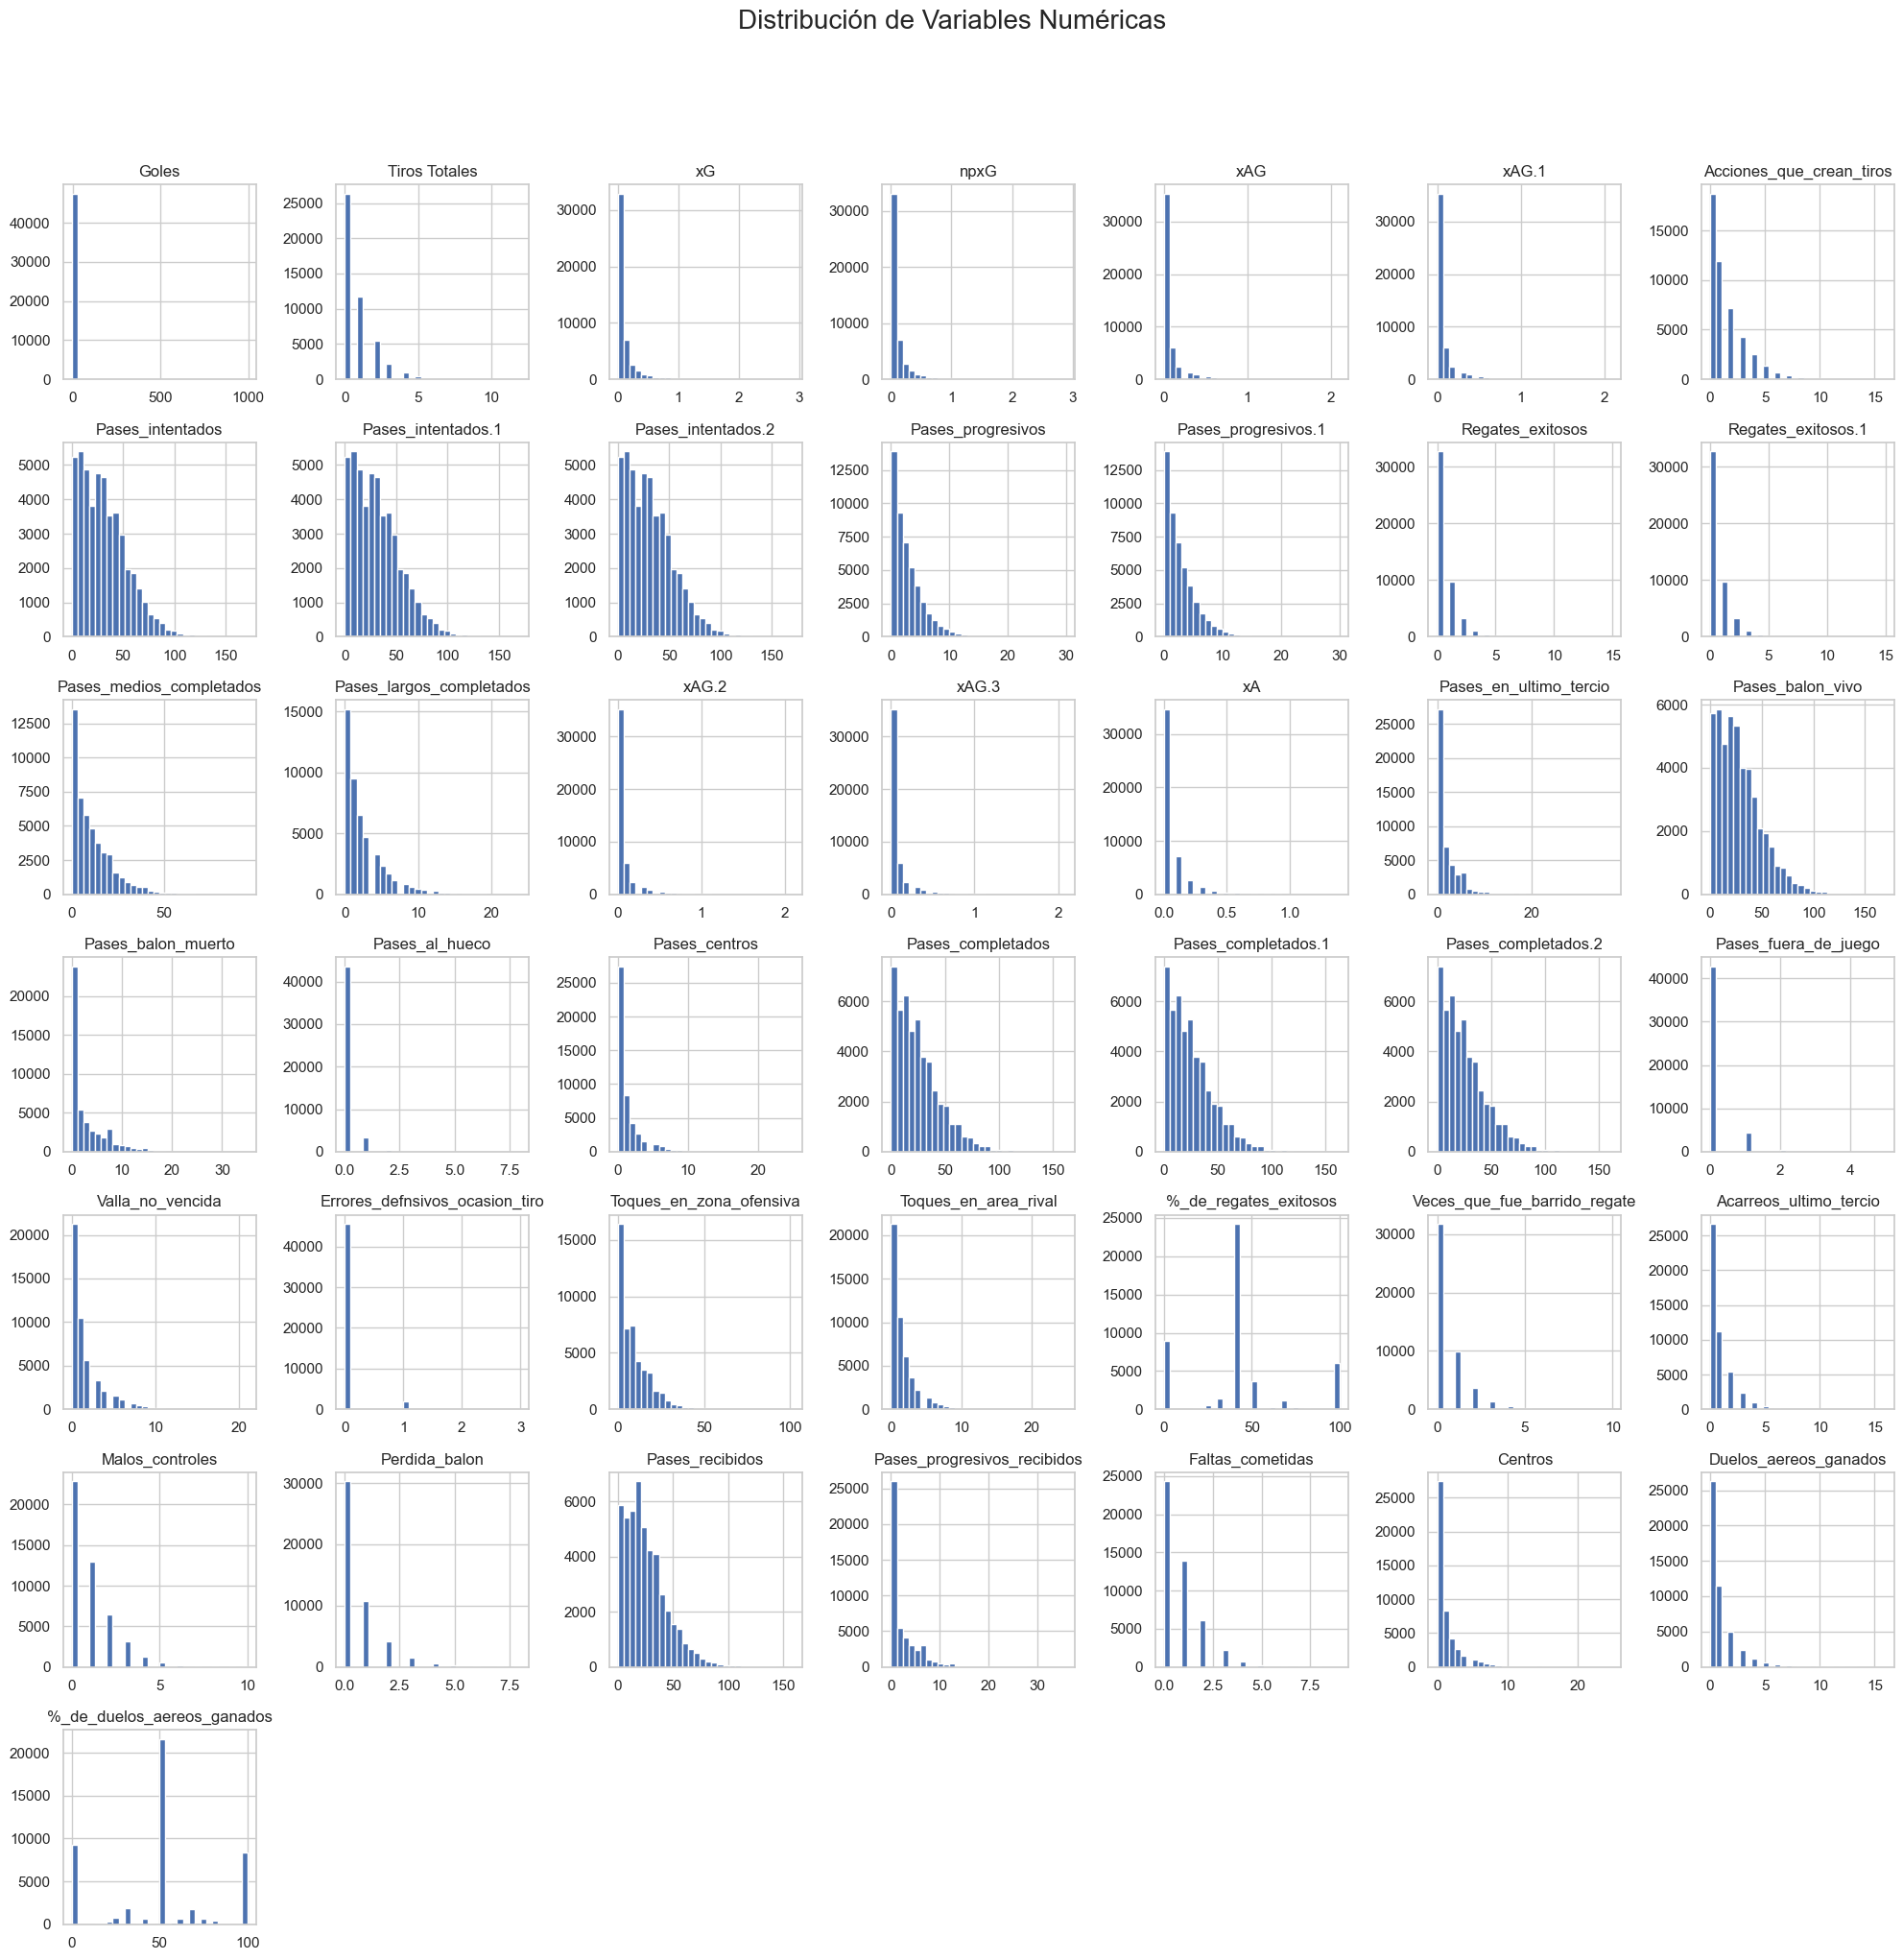

In [27]:
# ====================================
# 7. Visualizaciones básicas
# ====================================
fig = plt.figure(figsize=(20, 20))
df[num_cols].hist(bins=30, figsize=(20, 20))
plt.suptitle("Distribución de Variables Numéricas", fontsize=20, y=1.02)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()


## 8. Conclusión
El flujo de trabajo asegura que el dataset está preparado y estandarizado.  
El archivo **`dataset_limpio.csv`** será el utilizado para **entrenar los modelos de Machine Learning** y realizar los experimentos posteriores del laboratorio.